In [62]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

In [63]:
d = pd.read_csv('../tables/merged_final.csv')

In [64]:
data = d.dropna(subset=['Longitude', 'Latitude', 'k_obs'])

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_53448/838391835.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_53448/838391835.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_53448/838391835.py:32: SettingWithCopyWarning: 
A value is trying to be set on a c

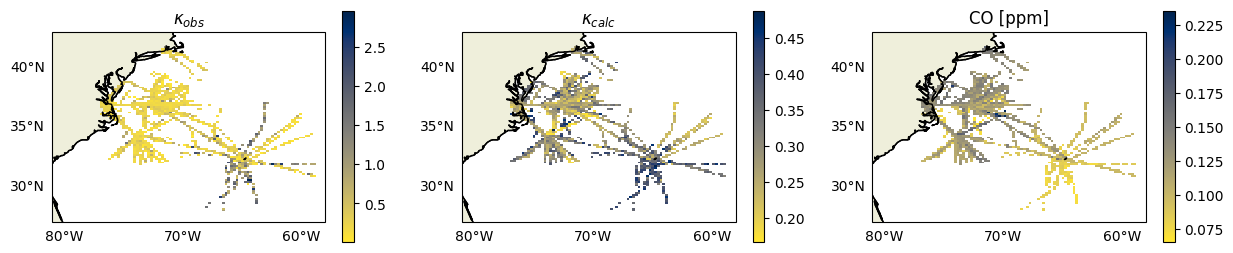

In [ ]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''




# Set up the map projection and plot area
fig, axes = plt.subplots(1,3, figsize=(15,3), subplot_kw={'projection': ccrs.PlateCarree()})

plt_key = ['k_obs', 'k', 'CO_ppm']
cmap_labels = [r'$\kappa _{obs}$', r'$\kappa _{calc}$', 'CO [ppm]']

for i in range(0,3):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='cividis_r', transform=ccrs.PlateCarree())
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees

    gl.xlines = False
    gl.ylines = False

# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')

# Show the plot
plt.savefig('../figures/k_obs_map3.png', dpi=1000)


/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_53448/1493331882.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_53448/1493331882.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_53448/1493331882.py:32: SettingWithCopyWarning: 
A value is trying to be set on 

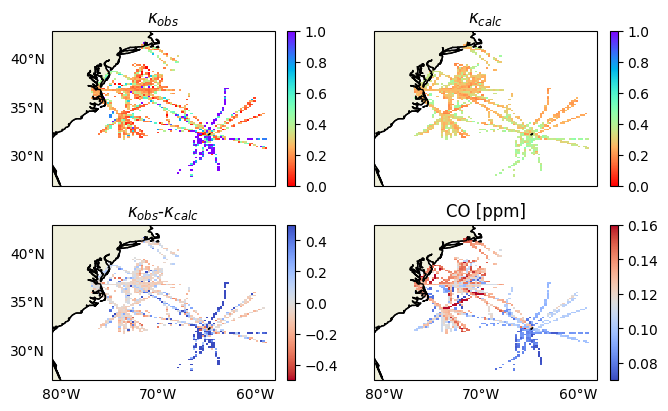

In [106]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''




# Set up the map projection and plot area
fig, axes = plt.subplots(2,2, figsize=(6.5,4), subplot_kw={'projection': ccrs.PlateCarree()}, sharex='all', sharey='all', constrained_layout=True)

plt_key = ['k_obs', 'k']
cmap_labels = [r'$\kappa _{obs}$', r'$\kappa _{calc}$']

for i in range(0,2):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[0,i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='rainbow_r', transform=ccrs.PlateCarree(), vmin=0, vmax=1)
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([])  # Longitude labels every 5 degrees
    if i ==0:
        gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees
    else:
        gl.ylocator = mticker.FixedLocator([])

    gl.xlines = False
    gl.ylines = False
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')


plt_key = ['k_diff', 'CO_ppm']
cmap_labels = [r'$\kappa _{obs}$-$\kappa _{calc}$', 'CO [ppm]']
vmax_l = [.5, 0.16]
vmin_l = [-.5, 0.07]
cmap_l = ['coolwarm_r','coolwarm']
for i in range(0,2):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[1,i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap=cmap_l[i], transform=ccrs.PlateCarree(), vmax=vmax_l[i], vmin=vmin_l[i])
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    if i ==0:
        gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees
    else:
        gl.ylocator = mticker.FixedLocator([])

    gl.xlines = False
    gl.ylines = False
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')

# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')
#plt.tight_layout()
# Show the plot
plt.savefig('../figures/k_obs_map.png', dpi=1000)

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_53448/3678557731.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_53448/3678557731.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)


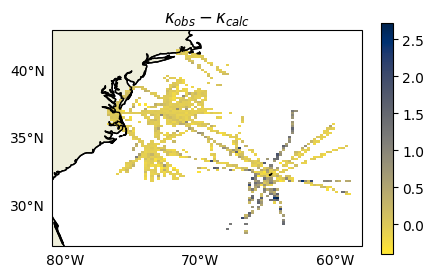

In [ ]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''


d['k_diff'] = d['k_obs'] - d['k']

# Set up the map projection and plot area
fig, ax = plt.subplots(figsize=(5,3), subplot_kw={'projection': ccrs.PlateCarree()})

plt_key = ['k_diff', 'k', 'CO_ppm']
cmap_labels = [r'$\kappa _{obs} - \kappa _{calc}$', r'$\kappa _{calc}$', 'CO [ppm]']

i=0
data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

# Define the grid resolution
lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

# Bin the data into the grid
data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

# Calculate the mean time for each grid cell
grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
#grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

# Create a 2D array of the grid
time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]


#ax=axes[i]
ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
#ax.add_feature(cfeature.OCEAN, edgecolor='black')
#ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
#ax.add_feature(cfeature.RIVERS)

# Plot the heatmap
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='cividis_r', transform=ccrs.PlateCarree())
ax.set_title(cmap_labels[i])
# Add a colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical')
#cbar.set_label(cmap_labels[i])

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees

gl.xlines = False
gl.ylines = False

# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')

# Show the plot
plt.savefig('../figures/k_obs_map_diff.png', dpi=1000)